<a href="https://colab.research.google.com/github/Anni-21/Python-Projects/blob/main/Page_View_Time_Series_Visualizer/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

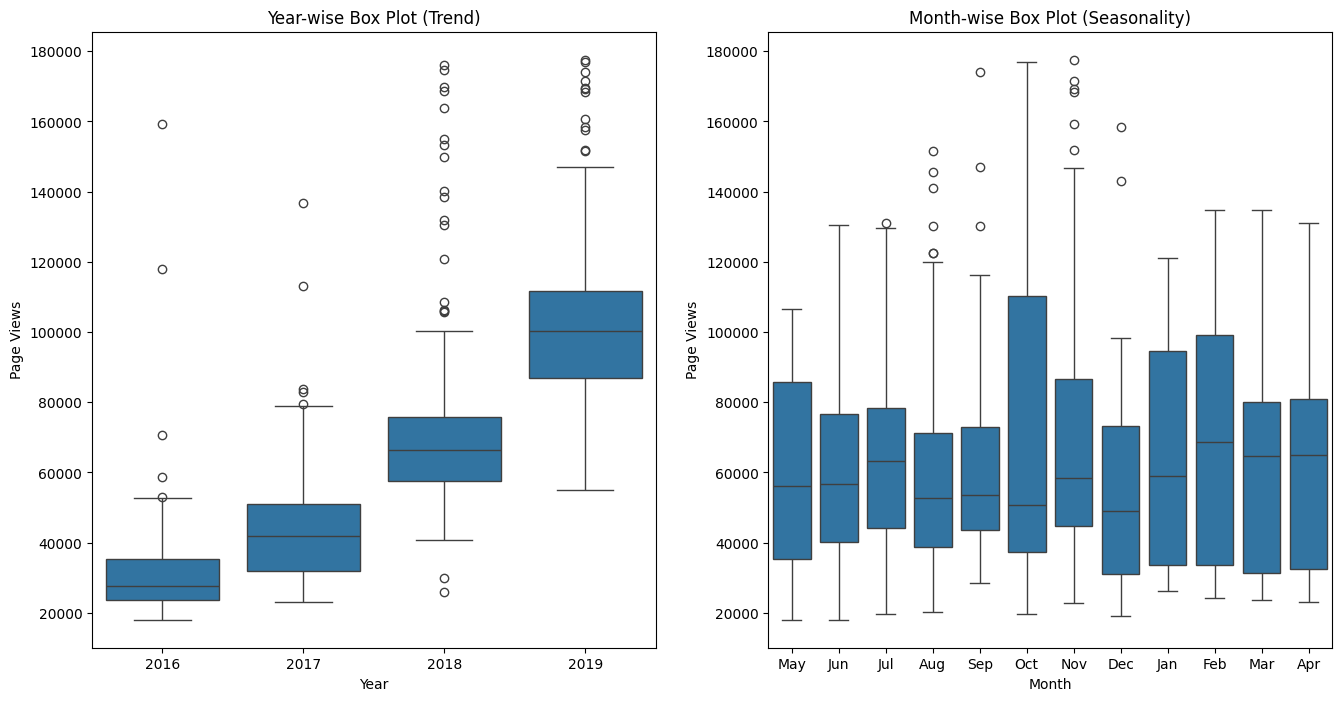

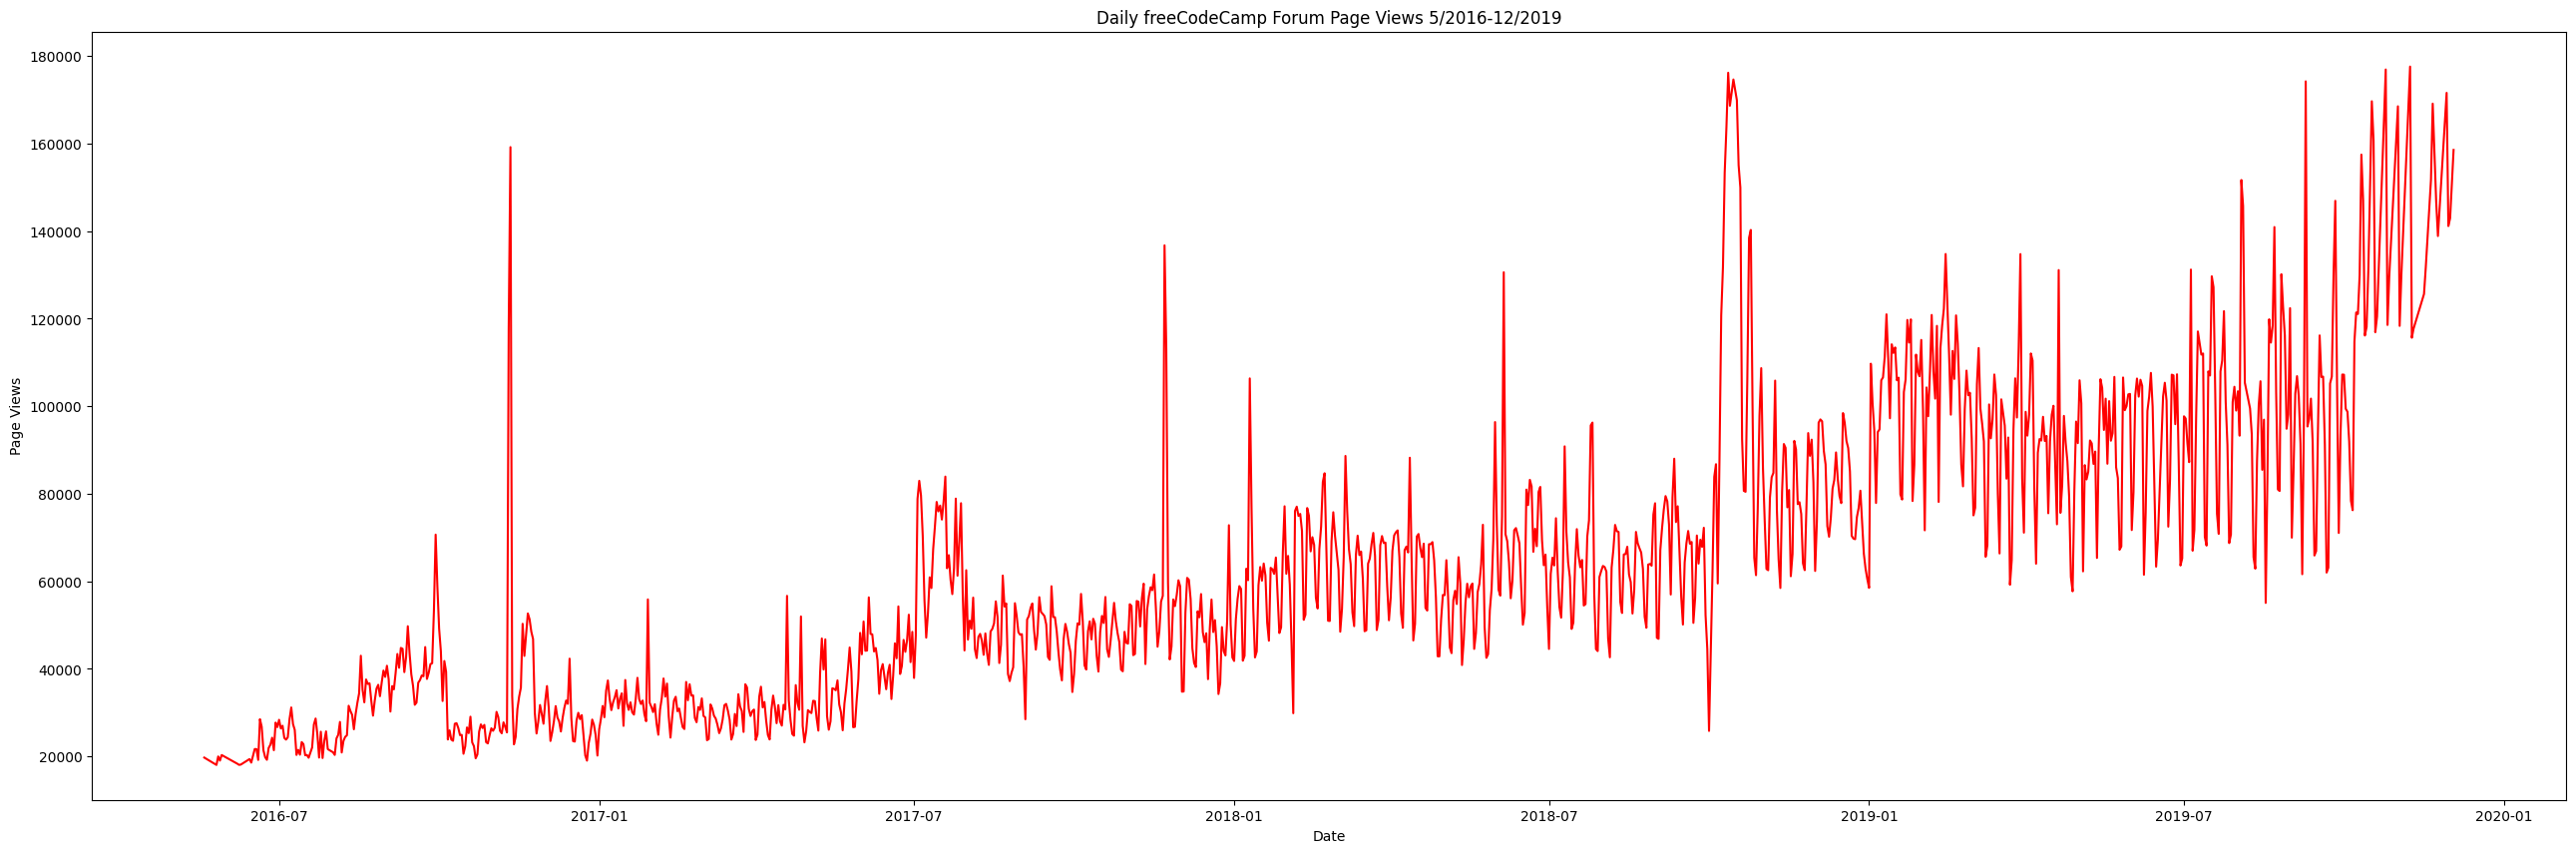

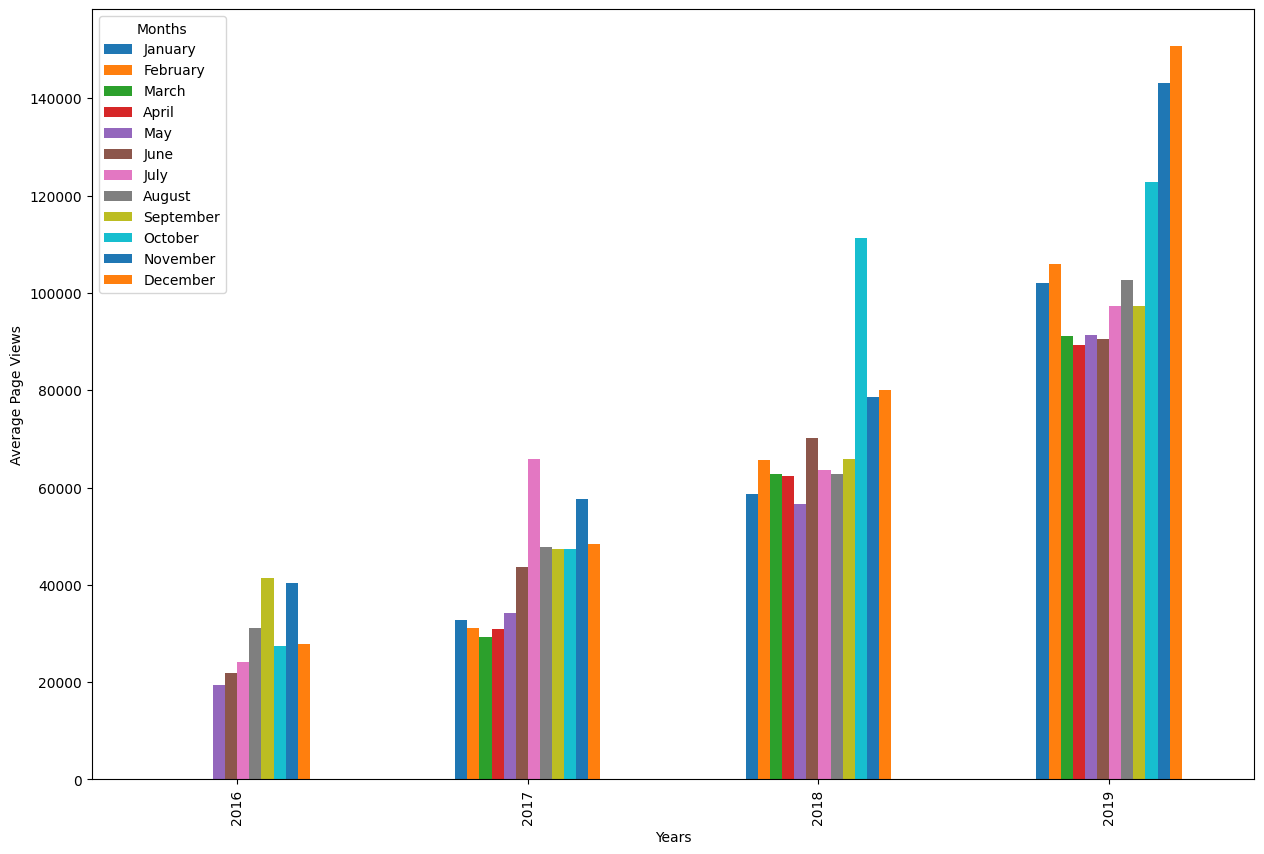

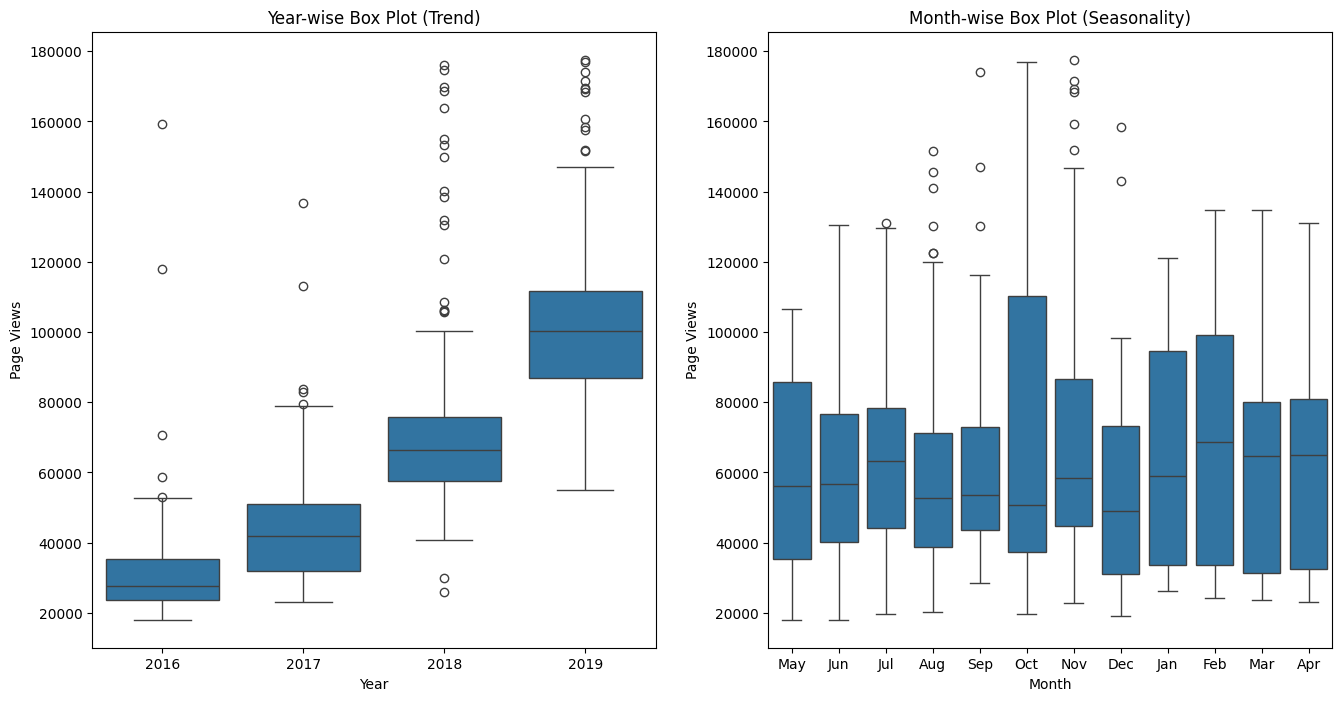

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("https://github.com/Shawwnscott/FreeCodeCamp-Data-Analysis-with-Python/raw/main/Page%20View%20Time%20Visualizer/fcc-forum-pageviews.csv", index_col = "date", parse_dates = True)

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize = (32,10), dpi = 100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data = df, legend = False, palette = ['r'])



    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month

    df_bar = df_bar.groupby(['year', 'month']).mean()

    df_bar = df_bar.unstack()
    df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    # Draw bar plot
    fig = df_bar.plot(kind = 'bar', figsize = (15, 10)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(loc = "upper left",title = "Months", fontsize = 10)




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
    sns.boxplot(data = df_box , ax = ax1, x = 'year', y = 'value')
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")


    sns.boxplot(data = df_box , ax = ax2, x = 'month', y = 'value')
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()